# London Bike Sharing
This is a preliminary analisys of the "London Bike Sharing" dataset. The goal is to practice exploratory data analysis with feature construction. The data comprise data from 1/1/2015 to 31/12/2016 and have been preprocessed from three original sources:

- Https://cycling.data.tfl.gov.uk/ 'Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019] 'Powered by TfL Open Data' 
- freemeteo.com - weather data 
- https://www.gov.uk/bank-holidays 

The data from cycling dataset is grouped by "Start time", this represent the count of new bike shares grouped by hour. The long duration shares are not taken in the count.

There are ten attributes:
- timestamp: the timestamp
- cnt: number of bikes
- t1: actual temperature
- t2: temperature as it feels
- hum: humidity \%
- wind_speed: km/h
- weather_code: code
- is_holiday: boolean
- is_weekend: boolean
- season: season_code

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

# ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("london_merged.csv")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Feature Creation
Timestamp encodes a lot of information that is unusable when contained in one variable. So first, let's extract all the information we might be interested in.

In [3]:
df['weekday'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").weekday())

In [4]:
df['year'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").year)

In [5]:
df['month'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").month)

In [6]:
df['hour'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)

In [7]:
df['minute'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").minute)

Let's check minutes, since I want to check whether the measurements are done hourly. 

In [8]:
df['minute'].describe()

count    17414.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: minute, dtype: float64

Yes, they are hourly so let's eliminate this attribute and obviously also *timestamp*

In [9]:
df.drop(['minute','timestamp'],axis=1,inplace=True)

In [10]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekday,year,month,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2.99265,2015.507810,6.514643,11.513265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,2.00406,0.508157,3.452509,6.915893
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2015.000000,1.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.00000,2015.000000,4.000000,6.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,3.00000,2016.000000,7.000000,12.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,5.00000,2016.000000,10.000000,18.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,6.00000,2017.000000,12.000000,23.000000


Also note that we have two temperatures, the real one t1 and the perceived one t2. It might be interesting to check the difference so that we can get extra information about the weather. If t2-t1 is higher, it means that the perceived temperature is higher, so it might depend on a warmer wind or else. Similarly if the difference is negative.

In [11]:
df['dt'] = df['t2'] - df['t1']

# Other Ideas about how to explore and preprocess the data
- check for missing values => No missing values
- stats
- plot cnt with respect to the other attributes
- groupby weekday and plot ... 
- % of cnt for each hour over day ... 
- correlations ... 



In [12]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weekday,year,month,hour,dt
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2.99265,2015.507810,6.514643,11.513265,-0.947255
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,2.00406,0.508157,3.452509,6.915893,1.395621
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2015.000000,1.000000,0.000000,-7.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.00000,2015.000000,4.000000,6.000000,-2.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,3.00000,2016.000000,7.000000,12.000000,0.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,5.00000,2016.000000,10.000000,18.000000,0.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,6.00000,2017.000000,12.000000,23.000000,1.000000


We note that there are no missing values and cnt might be skewed

In [13]:
target_variable = 'cnt'
input_variables = df.columns[df.columns!=target_variable]

In [14]:
target_variable

'cnt'

In [15]:
input_variables

Index(['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'weekday', 'year', 'month', 'hour', 'dt'],
      dtype='object')

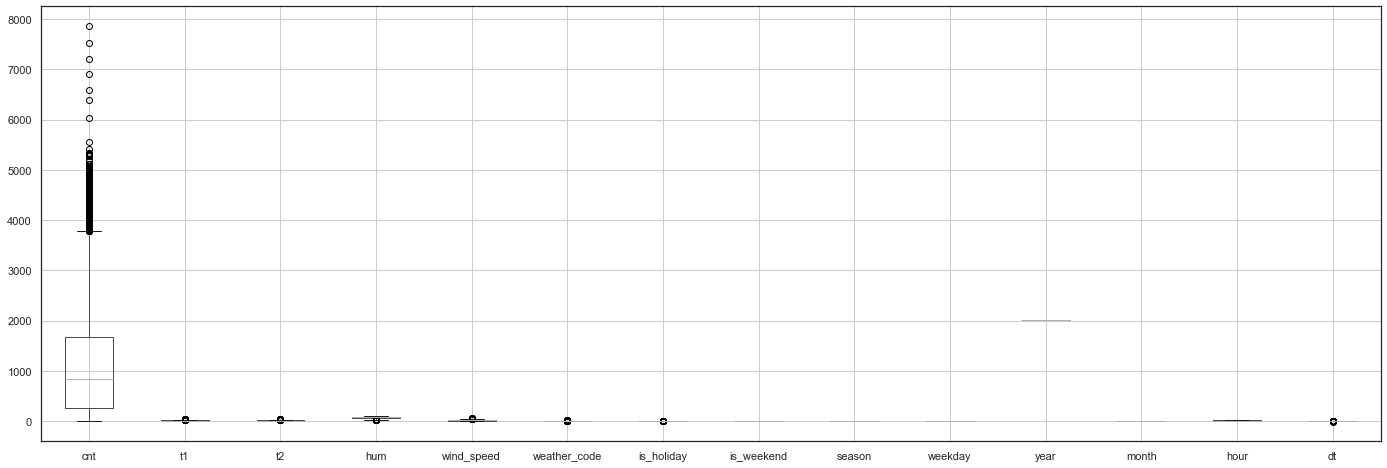

In [16]:
df.boxplot(figsize=(24,8));

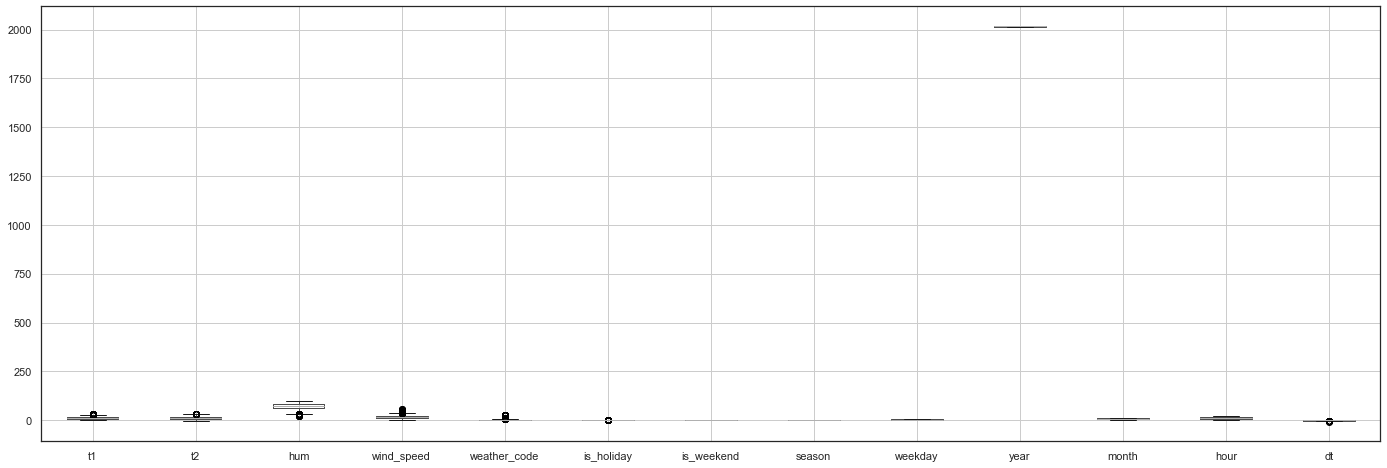

In [17]:
df[input_variables].boxplot(figsize=(24,8));

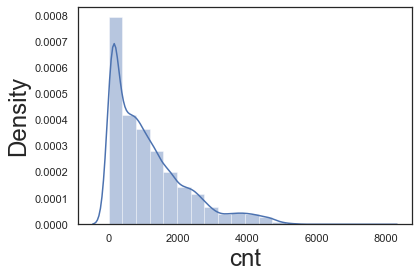

In [18]:
sns.distplot(df['cnt'], bins=20);

In [19]:
df['logcnt'] = np.log1p(df['cnt'])

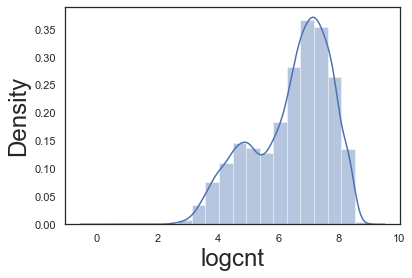

In [20]:
sns.distplot(df['logcnt'], bins=20);

In [21]:
target_variable = 'logcnt'

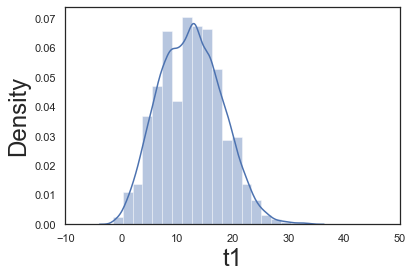

In [22]:
sns.distplot(df['t1'], bins=20);
plt.xlim([-10,50]);

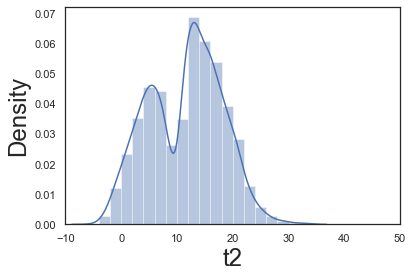

In [23]:
sns.distplot(df['t2'], bins=20);
plt.xlim([-10,50]);

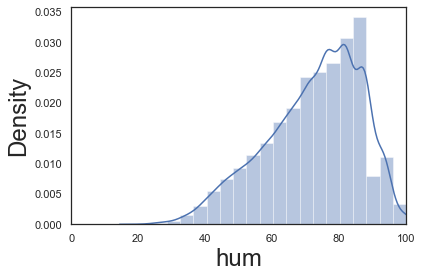

In [24]:
sns.distplot(df['hum'], bins=20);
plt.xlim([0,100]);

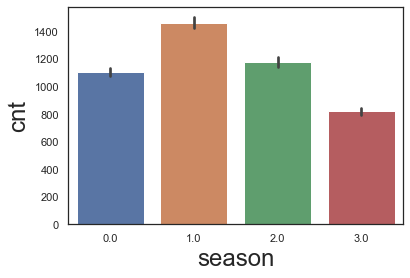

In [25]:
sns.barplot(x=df['season'],y=df['cnt']);

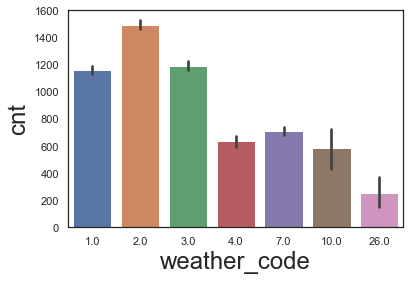

In [26]:
sns.barplot(x=df['weather_code'],y=df['cnt']);

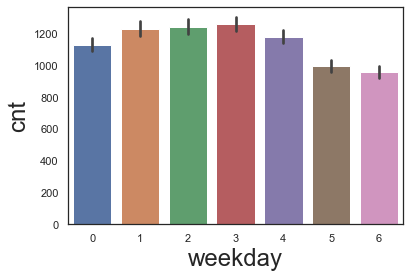

In [27]:
sns.barplot(x=df['weekday'],y=df['cnt']);

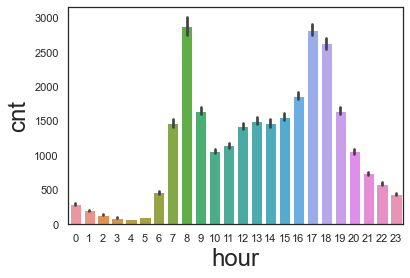

In [28]:
sns.barplot(x=df['hour'],y=df['cnt']);

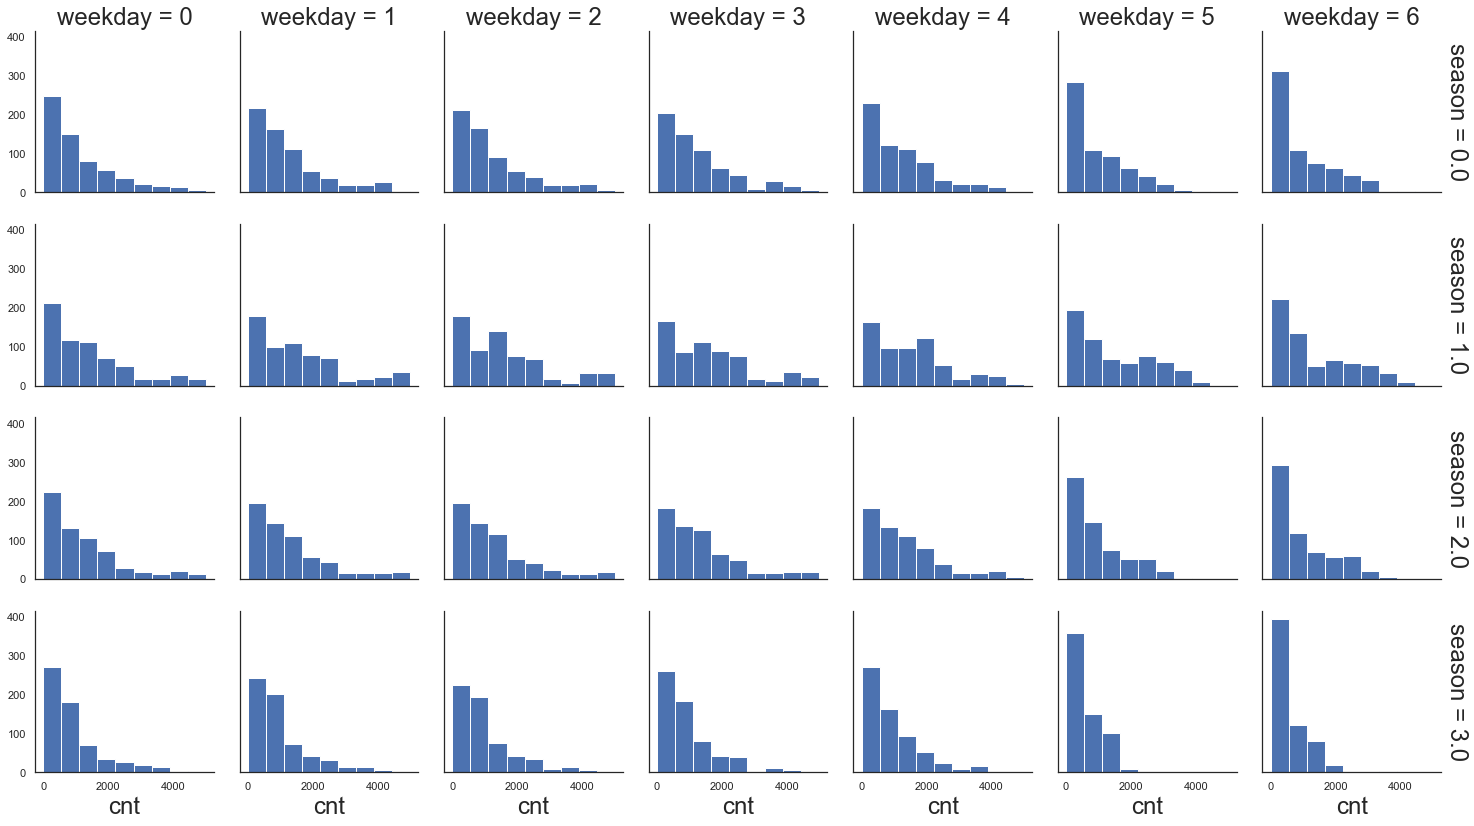

In [29]:
g = sns.FacetGrid(df, row='season', col='weekday',margin_titles=True);
g = g.map(plt.hist, "cnt", bins=np.linspace(0,5000,10));

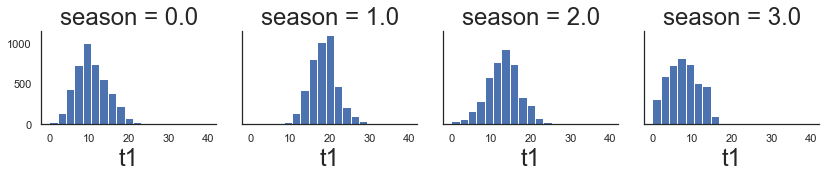

In [30]:
g = sns.FacetGrid(df, col='season', margin_titles=True);
g = g.map(plt.hist, "t1", bins=np.linspace(0,40,20));

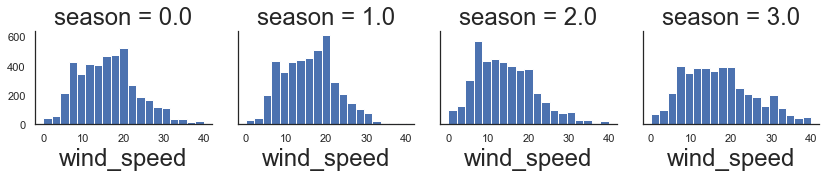

In [31]:
g = sns.FacetGrid(df, col='season', margin_titles=True);
g = g.map(plt.hist, "wind_speed", bins=np.linspace(0,40,20));

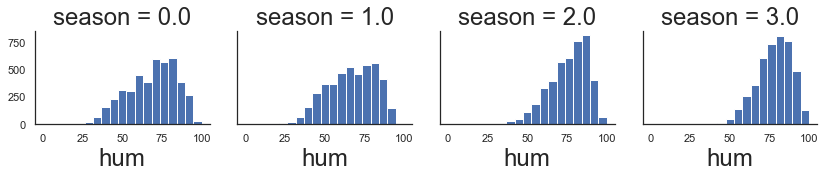

In [32]:
g = sns.FacetGrid(df, col='season', margin_titles=True);
g = g.map(plt.hist, "hum", bins=np.linspace(0,100,20));

In [33]:
#sns.pairplot(df);

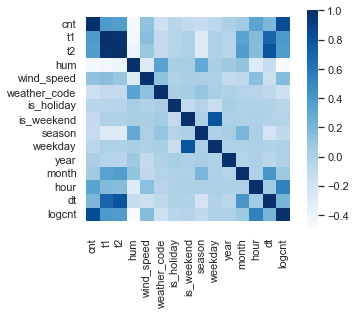

In [34]:
cov=df.corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

<Figure size 1080x1080 with 0 Axes>

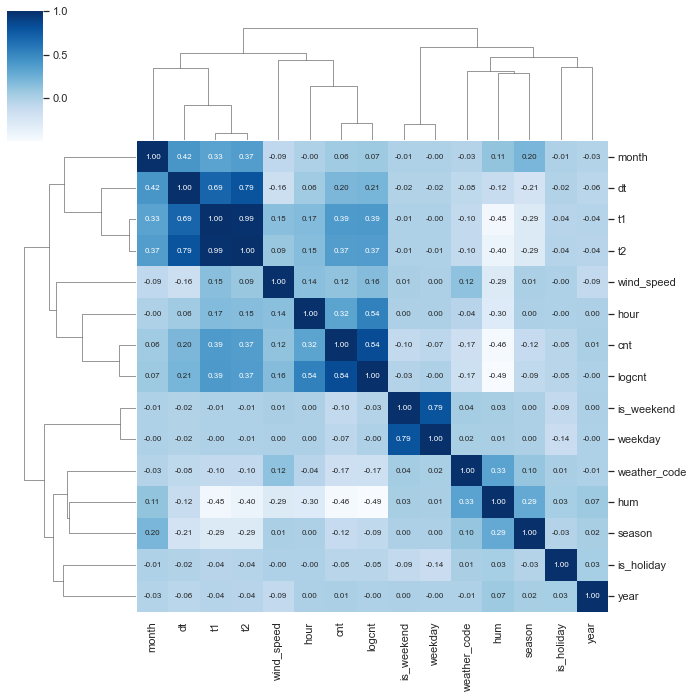

In [35]:
plt.figure(figsize=(15, 15));
sns.clustermap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');

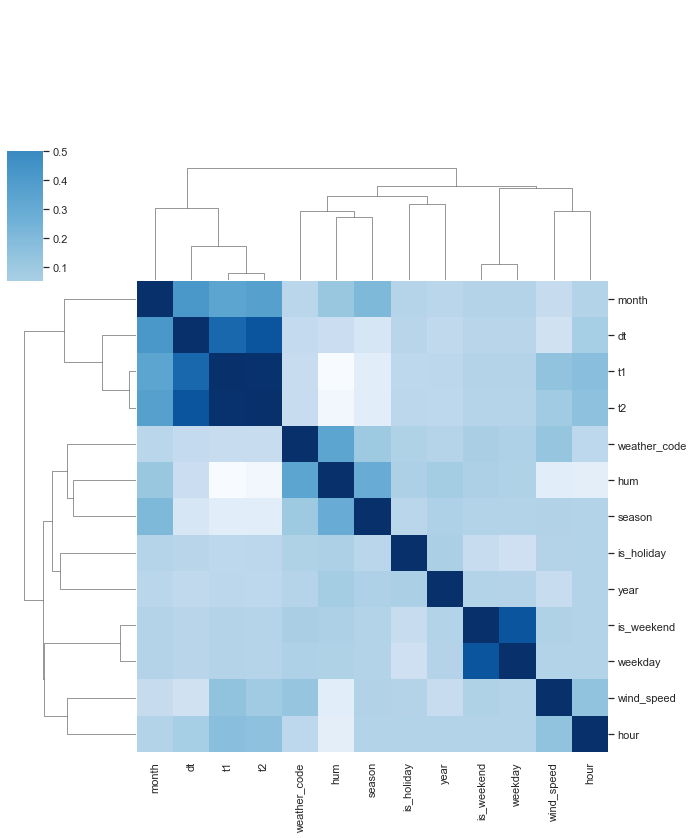

In [36]:
cov2=df[input_variables].corr(method='pearson')
sns.clustermap(cov2,square=True,annot=False,cmap="Blues",annot_kws={"size": 8},fmt='.2f');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X = df[input_variables]
y = df[target_variable]

In [ ]:
lr_model = LinearRegression();
lr_score = cross_val_score(lr_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
lr_score.mean()

In [ ]:
lr_score.std()

In [ ]:
lasso_model = LassoCV();
lasso_score = cross_val_score(lasso_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
lasso_score.mean()

In [ ]:
lasso_score.std()

In [ ]:
from sklearn.svm import SVR
svr_lin_model = SVR(kernel="linear")
svr_rbf_model = SVR(kernel="rbf")

In [ ]:
#svr_lin_score = cross_val_score(svr_lin_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
#svr_rbf_score = cross_val_score(svr_rbf_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, algorithm='kd_tree');
knn_score = cross_val_score(knn_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
knn_score.mean()

In [ ]:
knn_score.std()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(oob_score=True, random_state=1234);

In [ ]:
rf_model.fit(X,y)

In [ ]:
rf_model.oob_score_